In [1]:
import pandas as pd
from scripts.data import load_analysis_data
from scripts.correlation import correlation_analysis

data = load_analysis_data()

months = data.index.get_level_values(1).unique().tolist()

data = data.reset_index()
data["MonthNum"] = data["Month"].apply(months.index)

target_data = (
    data.sort_values(by=["Year", "MonthNum"])[
        ["Year", "Month", "PrecipMm", "TempMean", "MonthNum"]
    ]
    .reset_index()
    .dropna()
)
target_data.head(24)

,index,Year,Month,PrecipMm,TempMean,MonthNum
0,0,1991,Enero,190.0,24.0,0
1,34,1991,Febrero,30.5,22.9,1
2,68,1991,Marzo,55.0,22.7,2
3,102,1991,Abril,125.6,17.8,3
4,136,1991,Mayo,68.4,16.0,4
5,170,1991,Junio,119.7,11.0,5
6,204,1991,Julio,89.3,10.5,6
7,238,1991,Agosto,66.4,13.2,7
8,272,1991,Septiembre,85.5,15.8,8
9,306,1991,Octubre,131.7,16.6,9


In [8]:
xticks_data = target_data[target_data["MonthNum"] == 0]
xticklabels = pd.Series(xticks_data["Year"])
xticks = pd.Series(xticks_data.index.get_level_values(0))
print(xticks.head())
print(xticklabels.head())

0     0
1    12
2    24
3    36
4    48
dtype: int64
0     1991
12    1992
24    1993
36    1994
48    1995
Name: Year, dtype: int64


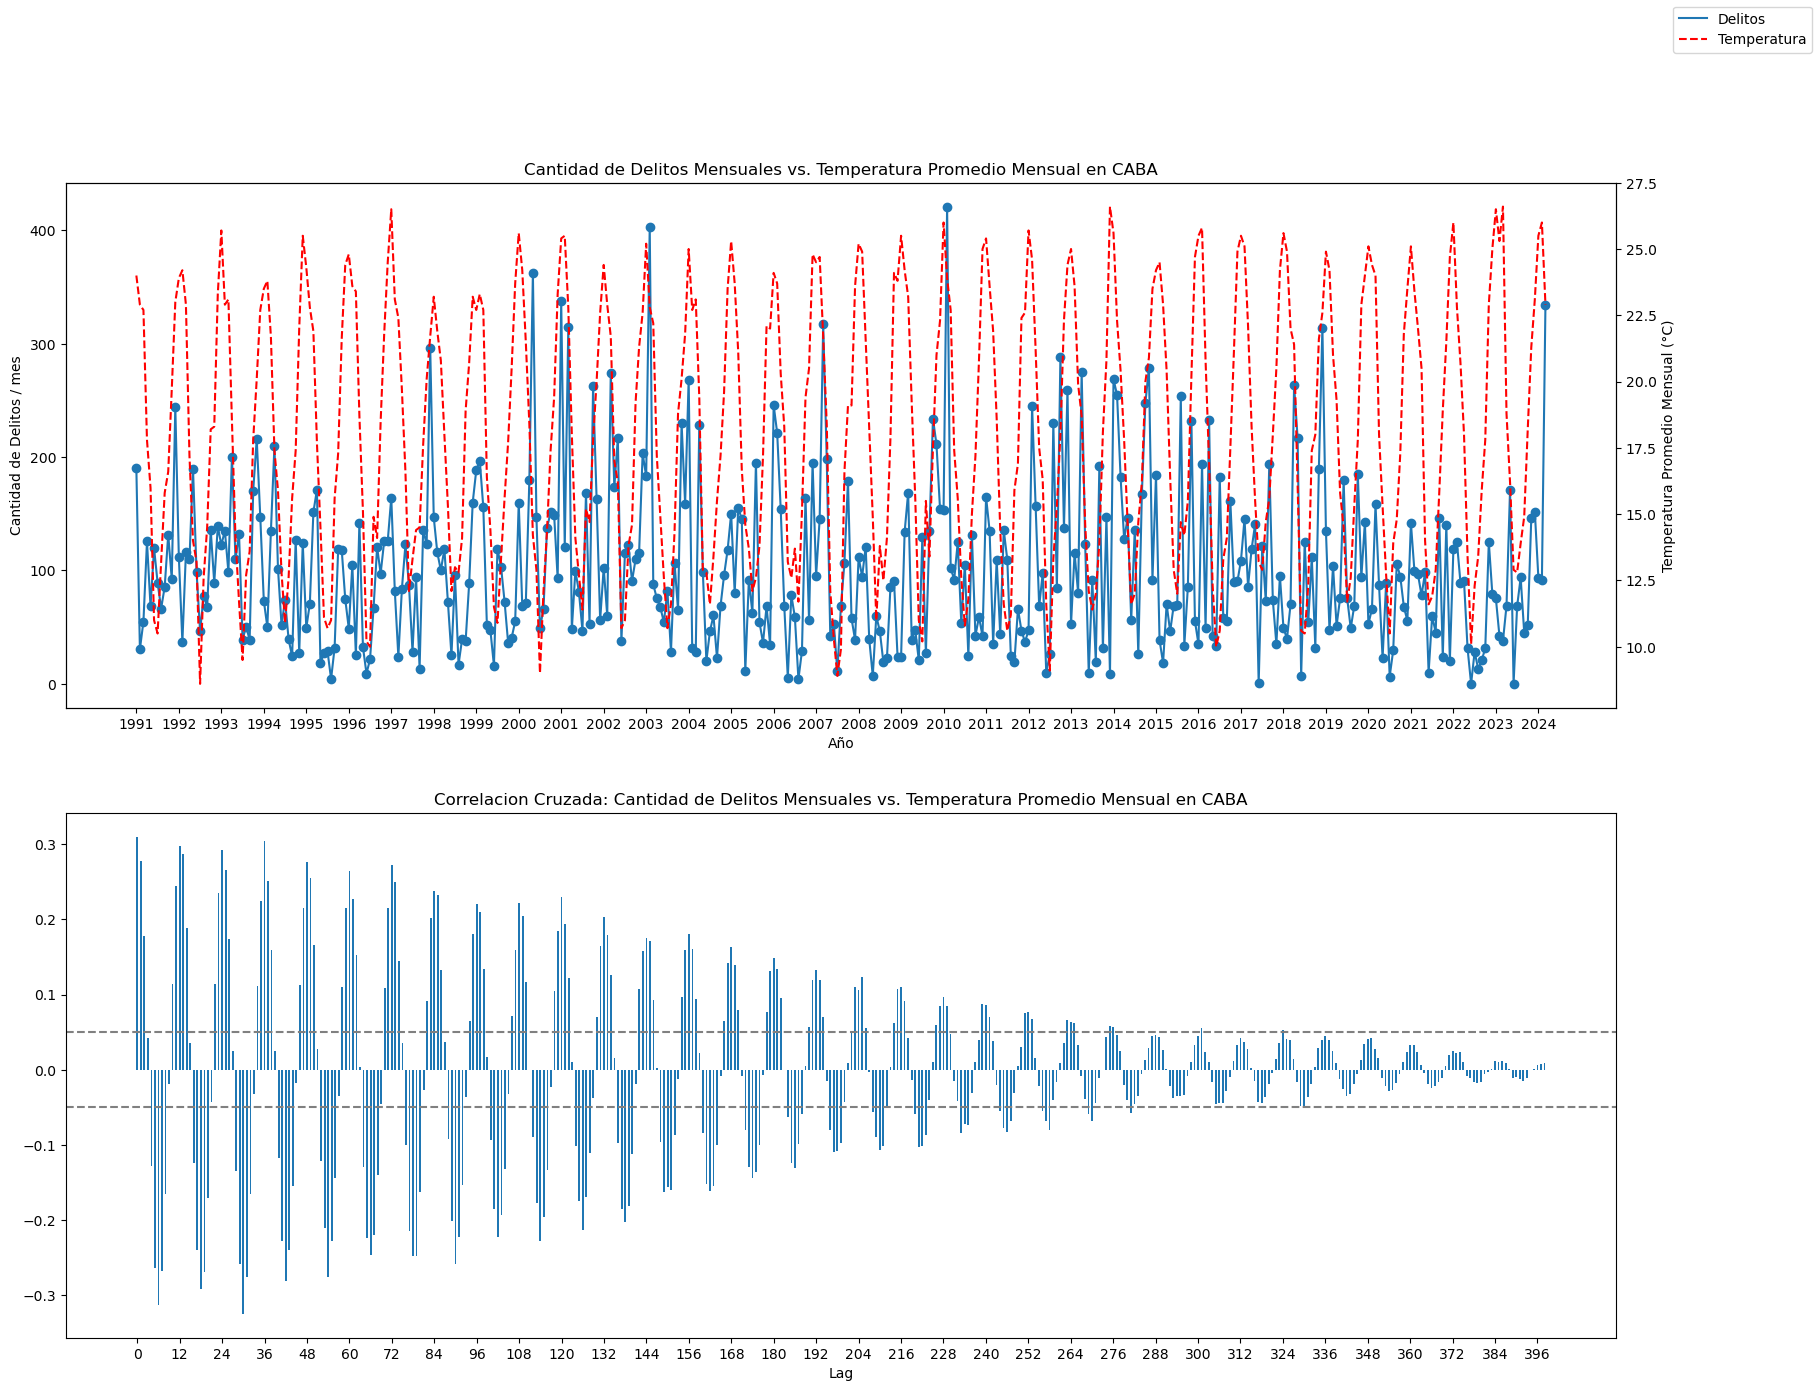

Coeficiente de Correlacion de Pearson: 0.3100520597286331


In [9]:
correlation_analysis(
    pd.Series(target_data["PrecipMm"]),
    pd.Series(target_data["TempMean"]),
    title="Cantidad de Delitos Mensuales vs. Temperatura Promedio Mensual en CABA",
    ts_xlabel="Año",
    ts_ylabel1="Cantidad de Delitos / mes",
    ts_ylabel2="Temperatura Promedio Mensual (°C)",
    ts_xticks=xticks,
    ts_xticklabels=xticklabels,
    corr_xticks=xticks,
    corr_xticklabels=None,
    ts_plot_opts1={"label": "Delitos"},
    ts_plot_opts2={"label": "Temperatura", "color": "red", "linestyle": "--"},
    corr_plot_opts={},
)